<a href="https://colab.research.google.com/github/johnmichaelbutler/tensorflow_tutorials/blob/main/image_classification_keras_basics_tensorflow_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Goal: Train a neural network model to classify images of clothing. 

This guide uses tf.keras to build and trian models in tf.

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.1


# Import the Fashion MNIST dataset

The fashion MNIST dataset contains 70,000 grayscale images in 10 categories. Each image shows an individual article of clothing at low resolution (28x28 pixels).

Replacement for classic MNIST dataset of handwritten digits. 

We will use 60,000 images to train the network and 10,000 to evaluate how acurately the network learned to classify images.

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


Loading the dataset returns four NumPy arrays.

- The `train_images` and `train_labels` arrays are the *training* set.

The images are a 28x28 np array, with pixel values from 0 to 255. The *labels* are an array of integers, ranging from 0-9. These correspond to the *class* of clothign the image represents

Label    | Class 
---------|-----------
0        | T-shirt/top
1        | Trouser
2        | Pullover
3        | Dress
4        | Coat
5        | Sandal
6        | Shirt
7        | Sneaker
8        | Bag
9        | Ankle boot


Each image is mapped to a single label. Since the *class names* are not includded with the dataset, let's store them for use later when plotting the images:



In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Explore the data

Let's explore teh data. Looking at the shape, we can see there are 60,000 images in the training set, with each image represented as 28x28 pixels:

In [ ]:
train_images.shape

(60000, 28, 28)

Each label is an integer between 0 and 9:

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

# Preprocess the data

The data must be preprocessed before training the entwork. If you expect the first image in the training set, you will see the pixel values fall in the range of 0 to 255:

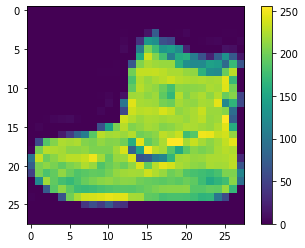

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Let's scale the values so they fall in the range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. Be sure to preprocess both the training and test set.

In [ ]:
train_images, test_images = train_images / 255.0, test_images / 255.0

To verify the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the training set and display the class name below each image.

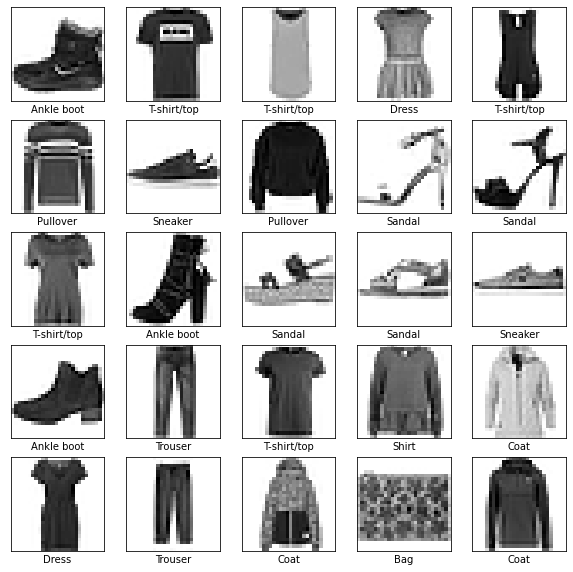

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

# Build the model

## Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from teh data fed into them. 

Most of deep learning consists of chaining togetehr simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [ ]:
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(28, 28)),
                             tf.keras.layers.Dense(128, activation='relu'),
                             tf.keras.layers.Dense(10)
])

The first layer, `tf.keras.layers.Flatten`, transformers the format of the image from a 2D array into a 1D array of 784 elements. This layer doesnt learn, it only reformats the data.

After teh pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. They are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

## Compile the model

Before the model is ready for training, it needs a few more settings. These are added during teh model's *compile* step:

- *Loss function* - This measures how accurately teh model is during training. You want to minimize teh function to "steer" the model in the right direction.
- *Optimizer* - This is how the model is updated based on teh data it sees and its loss function.
- *Metrics* - Used to monitor the training and testing steps. The follow example uses *accuracy*, the fraction of the images that are correctly classified.

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model

Training the neural network model requires the following steps:
1. Feed the training data to the model. In this example, the training data is in the `training_images` and `train_labels` arrays. 
2. The model learns to associate images and labels.
3. You ask the model to make predictiosn about a test set - in this example, the `test_images` array.
4. Verify that the predictions match the labels from teh `test_labels` array.

## Feed the model

To start training, call the `model.fit` method- so callec because it 'fits' the model to the training data:

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6255 - accuracy: 0.7823
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3845 - accuracy: 0.8636
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3438 - accuracy: 0.8733
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3075 - accuracy: 0.8901
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2922 - accuracy: 0.8940
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2804 - accuracy: 0.8971
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2655 - accuracy: 0.9019
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2542 - accuracy: 0.9035
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2435 - accuracy: 0.9082
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.234

As the model trains, the loss and accuracy metrics are displayed. This model reaches an accurancy of about 0.91 (or 91%) on the training data. 

# Evaluate the accuracy

Let's compare how the model performs on the test dataset:

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print('\nTest accuracy: ', test_acc)

313/313 - 0s - loss: 0.3430 - accuracy: 0.8834

Test accuracy:  0.883400022983551


It seems accuracy on the test dataset is less than the accuracy on the training dataset. The gap between the training and test accuracy represents *overfitting*. Overfitting happens when a ML model performs worse on new, previously unseen inputs that it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data.

# Make predictions

Wit the model trained, you can use it to make predictios about some images. The model's linear outputs logits. Let's attach a softmax layer to convert the logits to probabilities, which are easier to interpret.

In [ ]:
probability_model = tf.keras.Sequential([
                                         model,
                                         tf.keras.layers.Softmax()
])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Lets take a look at the first prediction:

In [ ]:
predictions[0]

array([1.13252703e-07, 5.80186737e-14, 3.03444908e-11, 3.13081288e-12,
       7.17619020e-11, 1.48510828e-03, 8.00163136e-08, 4.54592844e-03,
       1.15529375e-07, 9.93968606e-01], dtype=float32)

The prediction is an array of ten numbers. They represent the model's "confidence" that the image corresponds to each of teh 10 different articles of clothing. You can see which label has teh highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

The model's prediction is confident that the image is an ankle boot, or `class_name[9]`. Examining the test label shows that this classification is correct:

In [ ]:
print('Prediction ', class_names[np.argmax(predictions[0])])
print('\nLabel ', class_names[test_labels[0]])

Prediction  Ankle boot

Label  Ankle boot


Let's graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

  



## Verify predictions

With the model trained, you can use it to make predictions about some images.

Let's look at the 0th image, predictions and prediction array. Correct prediction labels are blue and incorrect labels are red. The number gives the percentage (out of 100) for the predicted label.

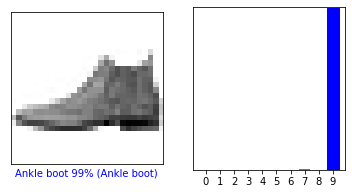

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

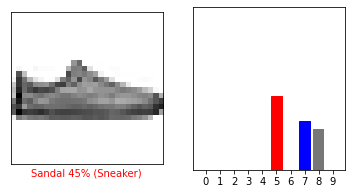

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

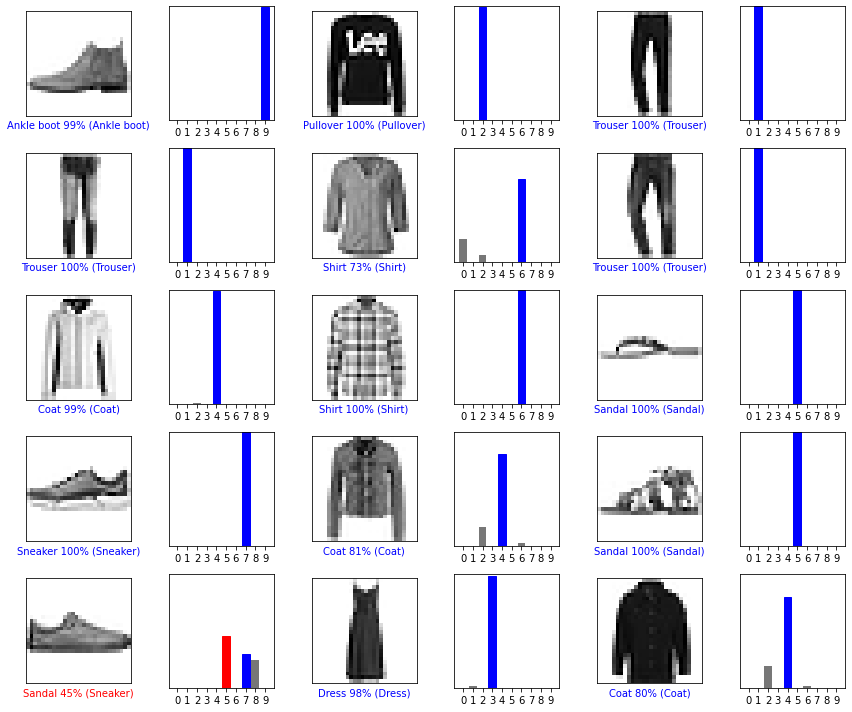

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# Use the trained model

Let's use the trained model to make a prediction about a single image.

In [ ]:
# Grab an image from the test dataset
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictiosn on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's teh only member.
img = (np.expand_dims(img, 0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.8782182e-04 2.7149097e-13 9.9822515e-01 2.6562819e-09 1.3827365e-03
  1.6058740e-08 2.0430220e-04 2.6576315e-19 5.7773317e-11 9.7662113e-14]]


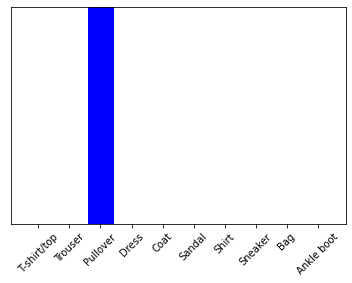

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists - one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

The model predicts a label as expected.